# About
This notebook contains EDA of restaurants in the sample dataset of Team 7.

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Load datasets

In [2]:
restaurant_df = pd.read_json('yelp_team7_dataset_restaurant.json')

In [3]:
restaurant_df.shape

(14970, 14)

In [4]:
categories_df = pd.read_json('yelp_team7_dataset_category.json')

In [5]:
categories_df.shape

(14891, 6)

# EDA

In [7]:
# How many restaurants are there in our sample for each top city?
restaurant_df.city.value_counts()

PORTLAND    3631
ATLANTA     3196
AUSTIN      3068
ORLANDO     2710
BOSTON      2365
Name: city, dtype: int64

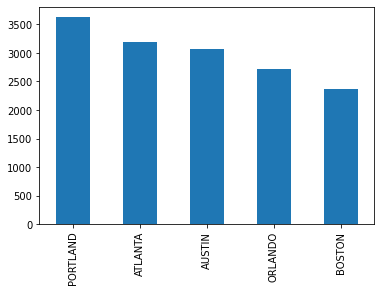

In [8]:
restaurant_df.city.value_counts().plot(kind = 'bar')
plt.show()

In [7]:
restaurant_df.city.value_counts(normalize = True)

PORTLAND    0.242552
ATLANTA     0.213494
AUSTIN      0.204943
ORLANDO     0.181029
BOSTON      0.157983
Name: city, dtype: float64

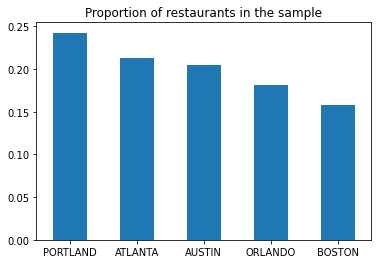

In [28]:
restaurant_df.city.value_counts(normalize = True).plot(kind = 'bar')
plt.title('Proportion of restaurants in the sample')
plt.xticks(rotation = 0)
#plt.show()
plt.savefig('cities_prop.png')

In [11]:
# How many restaurants were open?
restaurant_df.is_open.value_counts(normalize = True)

1    0.559519
0    0.440481
Name: is_open, dtype: float64

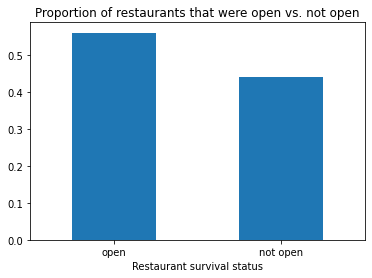

In [21]:
# looking at the proportion of restaurants that were open
fig = restaurant_df.is_open.value_counts(normalize = True). plot(kind = 'bar')
plt.title('Proportion of restaurants that were open vs. not open')
fig.set_xlabel('Restaurant survival status')
fig.set_xticklabels(['open', 'not open'], rotation = 0)
#plt.show()
plt.savefig('isopen_prop.png')

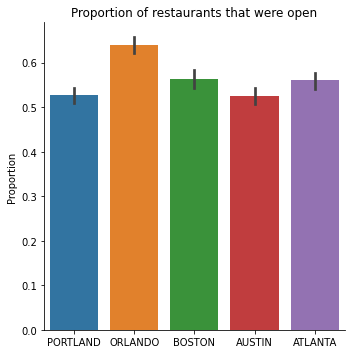

In [9]:
fig = sns.catplot(x = 'city', y = 'is_open', kind = 'bar', data = restaurant_df)
plt.title("Proportion of restaurants that were open")
fig.set(ylabel = 'Proportion', xlabel = None)
#plt.show()
plt.savefig('prop_open_by_city.png', bbox_inches='tight')

In [10]:
restaurant_df.groupby('city').agg({'is_open': 'mean'}).sort_values(by = 'is_open', ascending = False)

,is_open
city,
ORLANDO,0.639114
BOSTON,0.562791
ATLANTA,0.560075
PORTLAND,0.526301
AUSTIN,0.525424


In [11]:
restaurant_df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,tCbdrRPZA0oiIYSmHG3J0w,Flying Elephants at PDX,7000 NE Airport Way,PORTLAND,OR,97218,45.588906,-122.593331,4.0,126,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...","Salad, Soup, Sandwiches, Delis, Restaurants, C...","{'Monday': '5:0-18:0', 'Tuesday': '5:0-17:0', ..."
1,ufCxltuh56FF4-ZFZ6cVhg,Sister Honey's,247 E Michigan St,ORLANDO,FL,32806,28.513265,-81.374707,4.5,135,1,"{'BusinessParking': '{'garage': False, 'street...","Restaurants, American (New), Bakeries, Dessert...","{'Tuesday': '11:0-18:0', 'Wednesday': '11:0-18..."
2,jGennaZUr2MsJyRhijNBfA,Legal Sea Foods,1 Harborside Dr,BOSTON,MA,02128,42.363442,-71.025781,3.5,856,1,"{'NoiseLevel': 'u'average'', 'BikeParking': 'F...","Sandwiches, Food, Restaurants, Breakfast & Bru...","{'Monday': '6:0-21:0', 'Tuesday': '6:0-21:0', ..."
3,iPD8BBvea6YldQZPHzVrSQ,Espresso Minute,334 Mass Ave,BOSTON,MA,02115,42.342673,-71.084239,4.5,7,0,"{'NoiseLevel': ''quiet'', 'GoodForKids': 'True...","Creperies, Restaurants, Food, Coffee & Tea, Br...","{'Tuesday': '8:0-20:0', 'Wednesday': '8:0-20:0..."
4,jx91IMdGOmLOo8h_F9z39g,Cleary's Restaurant & Spirits,12429 NE Glisan St,PORTLAND,OR,97230,45.526473,-122.535323,3.5,19,1,"{'RestaurantsGoodForGroups': 'True', 'Alcohol'...","Nightlife, Sandwiches, Seafood, Restaurants","{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ..."


### Number of reviews

In [11]:
# number of reviews
restaurant_df.review_count.describe()

count    14970.00000
mean       166.83507
std        288.43093
min          5.00000
25%         24.00000
50%         74.00000
75%        195.00000
max       7219.00000
Name: review_count, dtype: float64

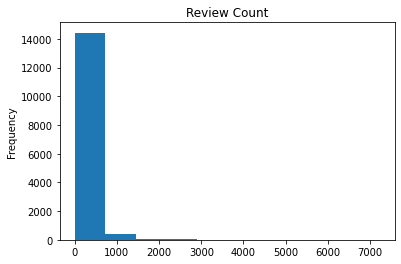

In [12]:
restaurant_df['review_count'].plot.hist(title = "Review Count")
plt.show()

The distribution of review count is very skewed. With few restaurants receiving a lot of reviews.

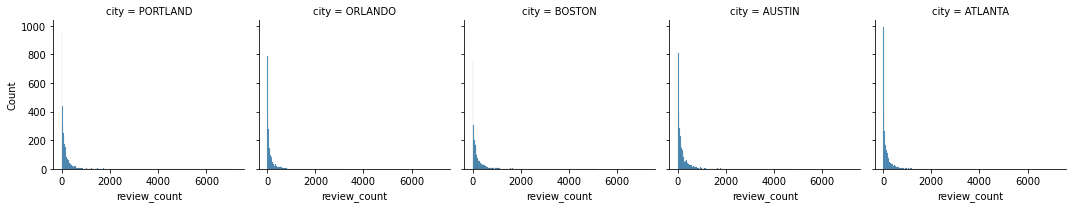

In [9]:
g = sns.FacetGrid(restaurant_df, col='city')
g.map_dataframe(sns.histplot, x = 'review_count')

Text(0.5, 1.0, 'Boxplot of city vs. review count')

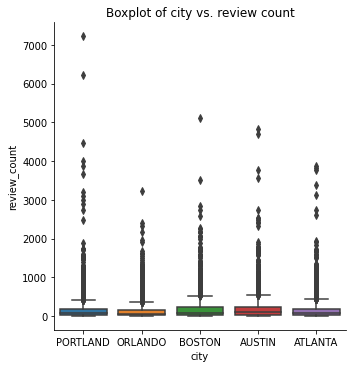

In [27]:
sns.catplot(x = 'city', y = 'review_count', kind = 'box', data = restaurant_df)
plt.title("Boxplot of city vs. review count")

Text(0.5, 1.0, 'Boxplot of city vs. review count')

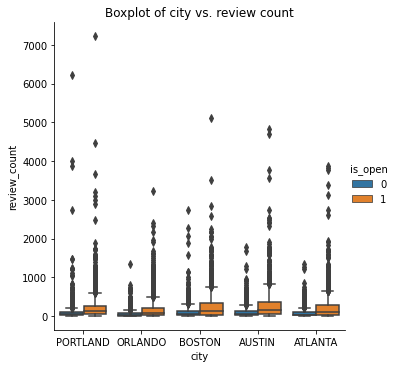

In [23]:
sns.catplot(x = 'city', y = 'review_count', hue = 'is_open', kind = 'box', data = restaurant_df)
plt.title("Boxplot of city vs. review count")

### Review Stars

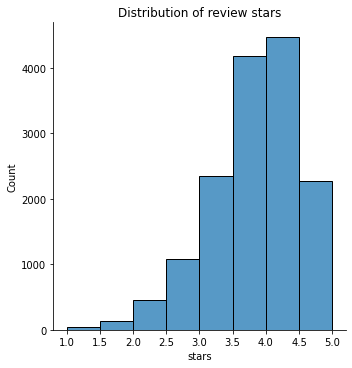

In [52]:
sns.displot(restaurant_df, x = 'stars', bins = [1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5])
plt.title('Distribution of review stars')
#plt.show()
plt.savefig('dist_stars.png', bbox_inches='tight')

In [41]:
restaurant_df.stars.describe()

count    14970.000000
mean         3.590381
std          0.684482
min          1.000000
25%          3.000000
50%          3.500000
75%          4.000000
max          5.000000
Name: stars, dtype: float64

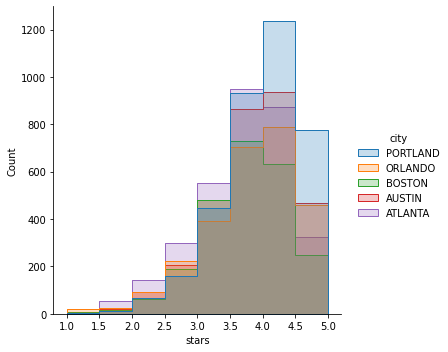

In [34]:
sns.displot(restaurant_df, x = 'stars', bins = [1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5], hue = 'city', element = 'step')

Text(0.5, 1.0, 'Distribution of review stars by restaurant status')

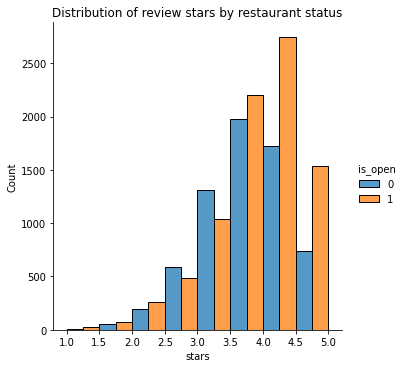

In [37]:
sns.displot(restaurant_df, x = 'stars', bins = [1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5], hue = 'is_open', multiple = 'dodge')
plt.title('Distribution of review stars by restaurant survival status')

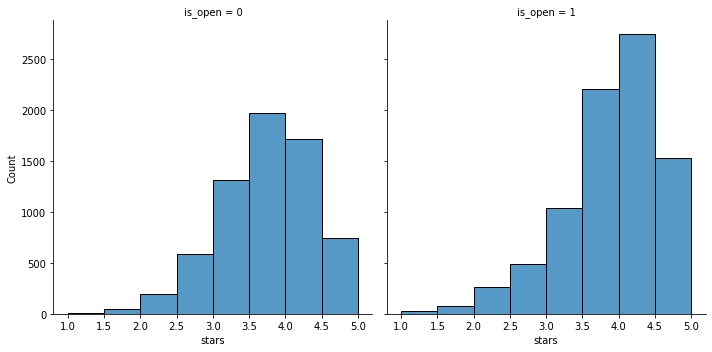

In [51]:
sns.displot(restaurant_df, x = 'stars', bins = [1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5], col = 'is_open')
#plt.show()
plt.savefig('dist_stars_by_open.png')

In [46]:
restaurant_df[restaurant_df['is_open'] == 1]['stars'].describe()

count    8376.000000
mean        3.663324
std         0.693214
min         1.000000
25%         3.500000
50%         4.000000
75%         4.000000
max         5.000000
Name: stars, dtype: float64

In [47]:
restaurant_df[restaurant_df['is_open'] == 0]['stars'].describe()

count    6594.000000
mean        3.497725
std         0.661785
min         1.000000
25%         3.000000
50%         3.500000
75%         4.000000
max         5.000000
Name: stars, dtype: float64

Text(0.5, 1.0, 'Distribution of review stars by city and restaurant status')

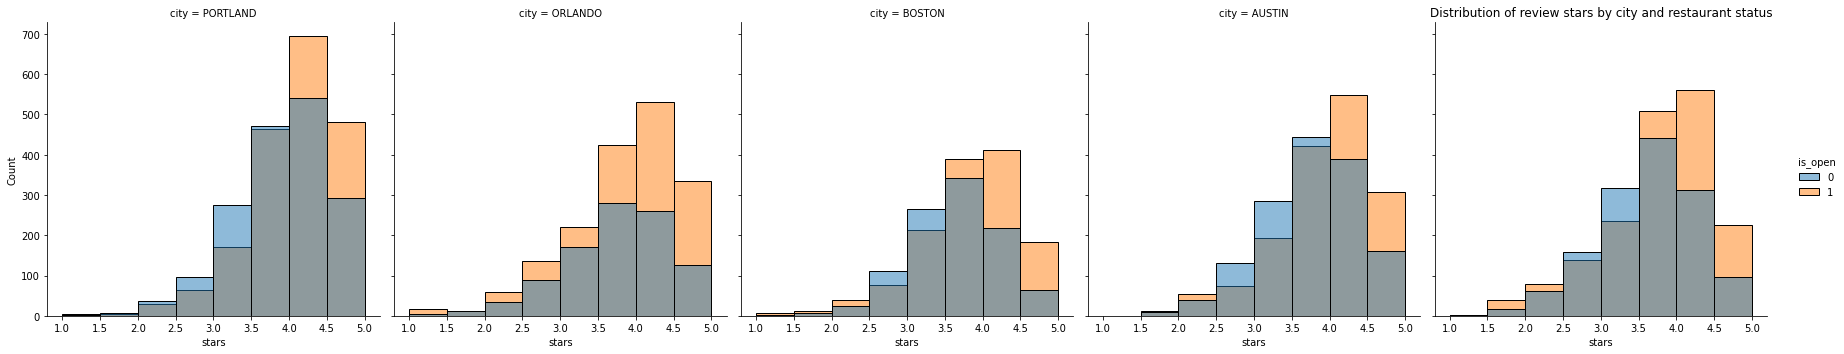

In [43]:
sns.displot(restaurant_df, x = 'stars', bins = [1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5], col = 'city', hue = 'is_open')
plt.title('Distribution of review stars by city and restaurant status')

### Categories

In [13]:
restaurant_category = restaurant_df.merge(categories_df, on = 'business_id', how = 'left')

In [14]:
restaurant_category.shape

(14970, 19)

In [49]:
restaurant_category.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,cuisine_type,food_type,atmosphere_type,dietary_type,hi_transmission_risk
0,tCbdrRPZA0oiIYSmHG3J0w,Flying Elephants at PDX,7000 NE Airport Way,PORTLAND,OR,97218,45.588906,-122.593331,4.0,126,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...","Salad, Soup, Sandwiches, Delis, Restaurants, C...","{'Monday': '5:0-18:0', 'Tuesday': '5:0-17:0', ...",None,Salad,Delis,Vegetarian,None
1,ufCxltuh56FF4-ZFZ6cVhg,Sister Honey's,247 E Michigan St,ORLANDO,FL,32806,28.513265,-81.374707,4.5,135,1,"{'BusinessParking': '{'garage': False, 'street...","Restaurants, American (New), Bakeries, Dessert...","{'Tuesday': '11:0-18:0', 'Wednesday': '11:0-18...",American,Bakeries,None,None,None
2,jGennaZUr2MsJyRhijNBfA,Legal Sea Foods,1 Harborside Dr,BOSTON,MA,02128,42.363442,-71.025781,3.5,856,1,"{'NoiseLevel': 'u'average'', 'BikeParking': 'F...","Sandwiches, Food, Restaurants, Breakfast & Bru...","{'Monday': '6:0-21:0', 'Tuesday': '6:0-21:0', ...",Italian,Sandwiches & Wraps,Bars related,Gluten-Free,Bars related
3,iPD8BBvea6YldQZPHzVrSQ,Espresso Minute,334 Mass Ave,BOSTON,MA,02115,42.342673,-71.084239,4.5,7,0,"{'NoiseLevel': ''quiet'', 'GoodForKids': 'True...","Creperies, Restaurants, Food, Coffee & Tea, Br...","{'Tuesday': '8:0-20:0', 'Wednesday': '8:0-20:0...",None,Desserts,None,None,None
4,jx91IMdGOmLOo8h_F9z39g,Cleary's Restaurant & Spirits,12429 NE Glisan St,PORTLAND,OR,97230,45.526473,-122.535323,3.5,19,1,"{'RestaurantsGoodForGroups': 'True', 'Alcohol'...","Nightlife, Sandwiches, Seafood, Restaurants","{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ...",None,Sandwiches & Wraps,None,None,Nightlife


In [24]:
# How many restaurants has cusine_type non missing?
restaurant_category.cuisine_type.isna().value_counts()

False    10637
True      4333
Name: cuisine_type, dtype: int64

<AxesSubplot:>

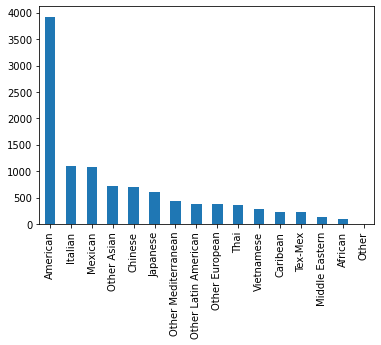

In [15]:
# what are the most popular cuisine type?
categories_df.cuisine_type.value_counts(sort = True).plot(kind = 'bar')

In [25]:
categories_df.cuisine_type.value_counts(normalize = True, sort = True)

American                0.368713
Italian                 0.102849
Mexican                 0.101908
Other Asian             0.068252
Chinese                 0.066090
Japanese                0.057253
Other Mediterranean     0.040237
Other Latin American    0.036288
Other European          0.034878
Thai                    0.032904
Vietnamese              0.027169
Caribean                0.020965
Tex-Mex                 0.020589
Middle Eastern          0.013068
African                 0.008367
Other                   0.000470
Name: cuisine_type, dtype: float64

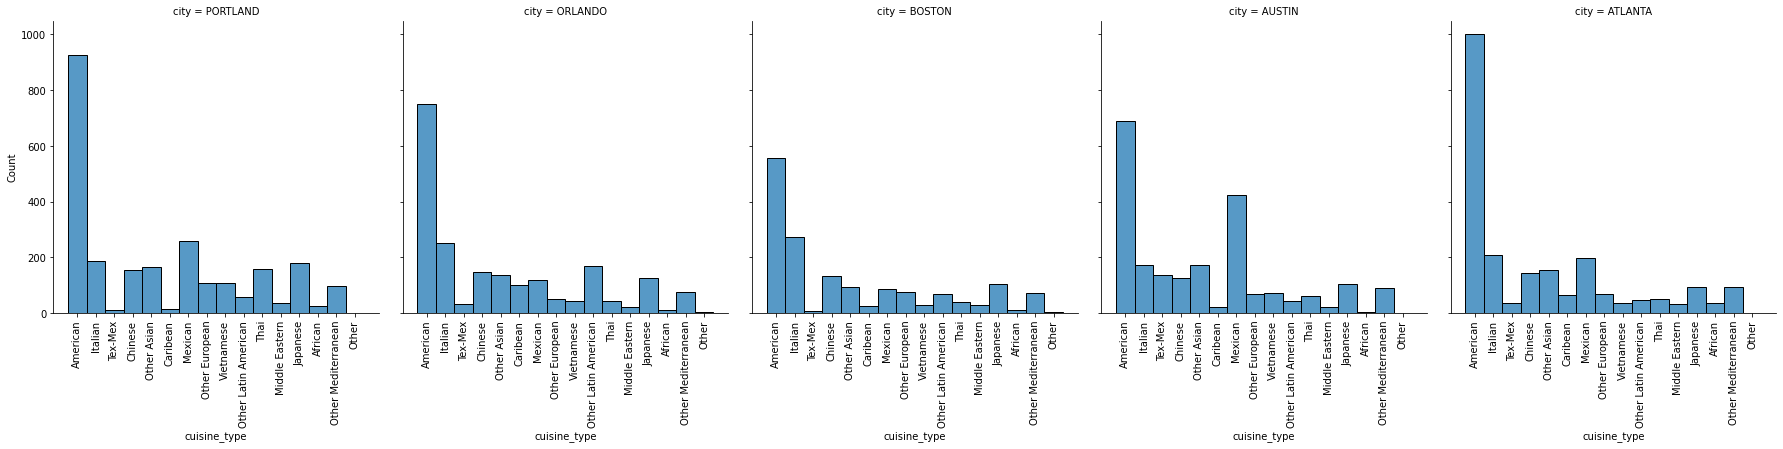

In [19]:
chart = sns.displot(restaurant_category, x = 'cuisine_type', col = 'city')
chart.set_xticklabels(rotation = 90)

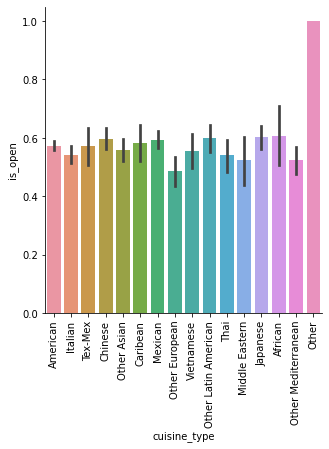

In [61]:
chart = sns.catplot(x = 'cuisine_type', y = 'is_open', kind = 'bar', data = restaurant_category)
chart.set_xticklabels(rotation = 90)

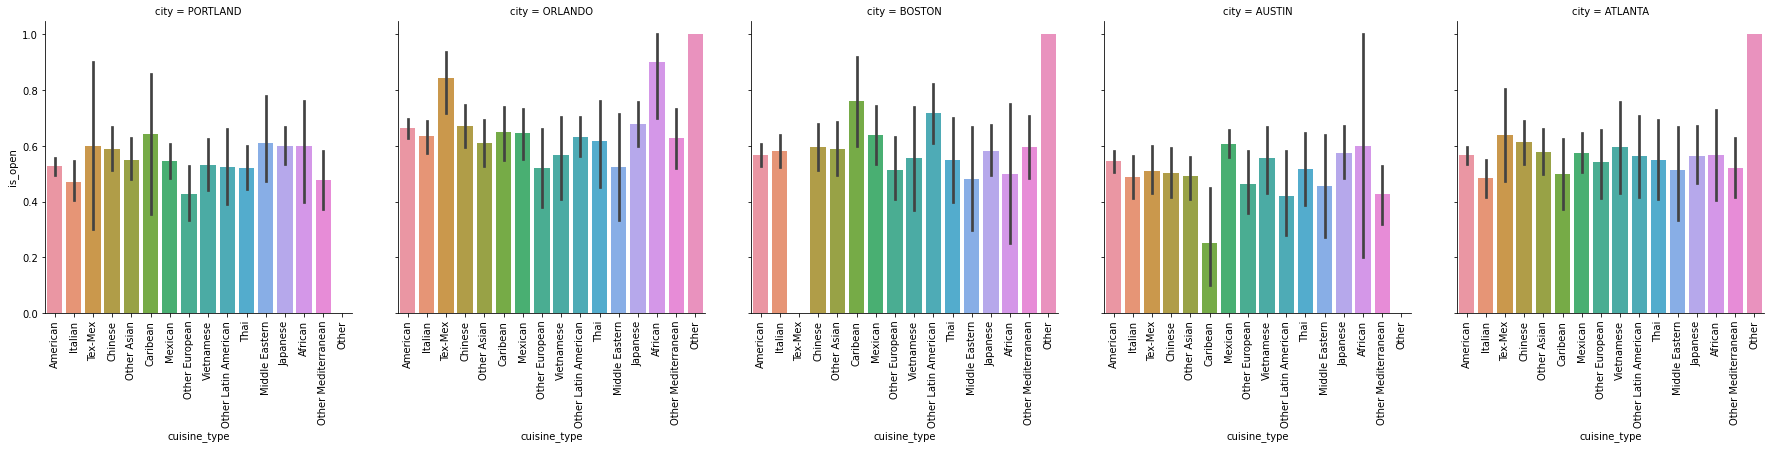

In [64]:
chart = sns.catplot(x = 'cuisine_type', y = 'is_open', kind = 'bar', col = 'city', data = restaurant_category)
chart.set_xticklabels(rotation = 90)

In [68]:
restaurant_category.loc[~restaurant_category['hi_transmission_risk'].isna(), 'hi_risk'] = 1
restaurant_category.loc[restaurant_category['hi_transmission_risk'].isna(), 'hi_risk'] = 0

In [69]:
restaurant_category['hi_risk'].value_counts(dropna = False)

0.0    10192
1.0     4778
Name: hi_risk, dtype: int64

Text(0.5, 1.0, 'Proportion of open: high vs. low tranmission risk restaurants')

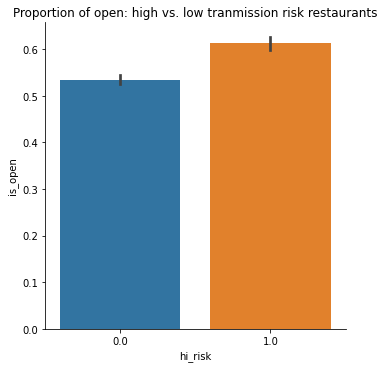

In [74]:
sns.catplot(x = 'hi_risk', y = 'is_open', kind = 'bar', data = restaurant_category)
plt.title('Proportion of open: high vs. low tranmission risk restaurants')

### Food type

In [30]:
# How many restaurants has cusine_type non missing?
restaurant_category.food_type.isna().value_counts(normalize = True)

False    0.60855
True     0.39145
Name: food_type, dtype: float64

<AxesSubplot:>

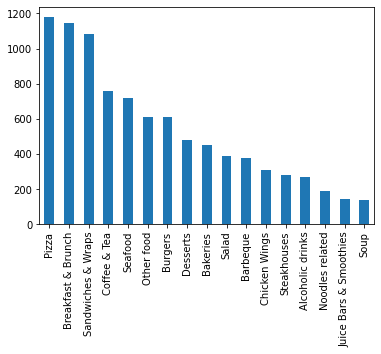

In [31]:
# what are the most popular food type?
categories_df.food_type.value_counts(sort = True).plot(kind = 'bar')

In [32]:
categories_df.food_type.value_counts(normalize = True, sort = True)

Pizza                     0.129528
Breakfast & Brunch        0.125576
Sandwiches & Wraps        0.118990
Coffee & Tea              0.083095
Seafood                   0.078814
Other food                0.066740
Burgers                   0.066740
Desserts                  0.052360
Bakeries                  0.049177
Salad                     0.042261
Barbeque                  0.041603
Chicken Wings             0.033589
Steakhouses               0.030735
Alcoholic drinks          0.029199
Noodles related           0.020966
Juice Bars & Smoothies    0.015368
Soup                      0.015258
Name: food_type, dtype: float64

In [33]:
13+12+12

37

### Atmosphere type

In [34]:
# How many restaurants has atmosphere_type non missing?
restaurant_category.atmosphere_type.isna().value_counts(normalize = True)

True     0.616032
False    0.383968
Name: atmosphere_type, dtype: float64

<AxesSubplot:>

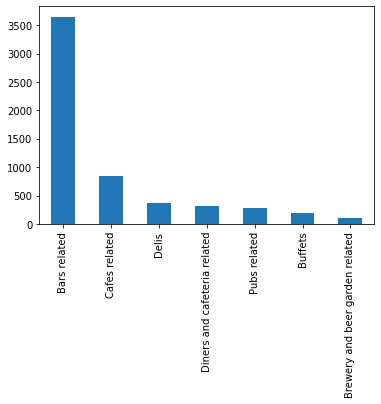

In [35]:
# what are the most popular food type?
categories_df.atmosphere_type.value_counts(sort = True).plot(kind = 'bar')